# Lecture 7. Data Cleaning and Preparation

In [1]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 10
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

---

During the course of doing data analysis and modeling, a significant amount of time is spent on data preparation: loading, cleaning, transforming, and rearranging. Such tasks are often reported to take up $80\%$ or more of an analyst’s time. In this section, we focus on 
* missing data
* analytical data transformations

---

## 7.1 Handling Missing Data

- Example: Firms’ characteristics from WRDS US Backtester database
   * Average of missing rates of 106 firm characteristics from Jan 1973 to Dec 2020: 18.24%
   * Missing rates decline over time; Missing rates higher for smaller firms 

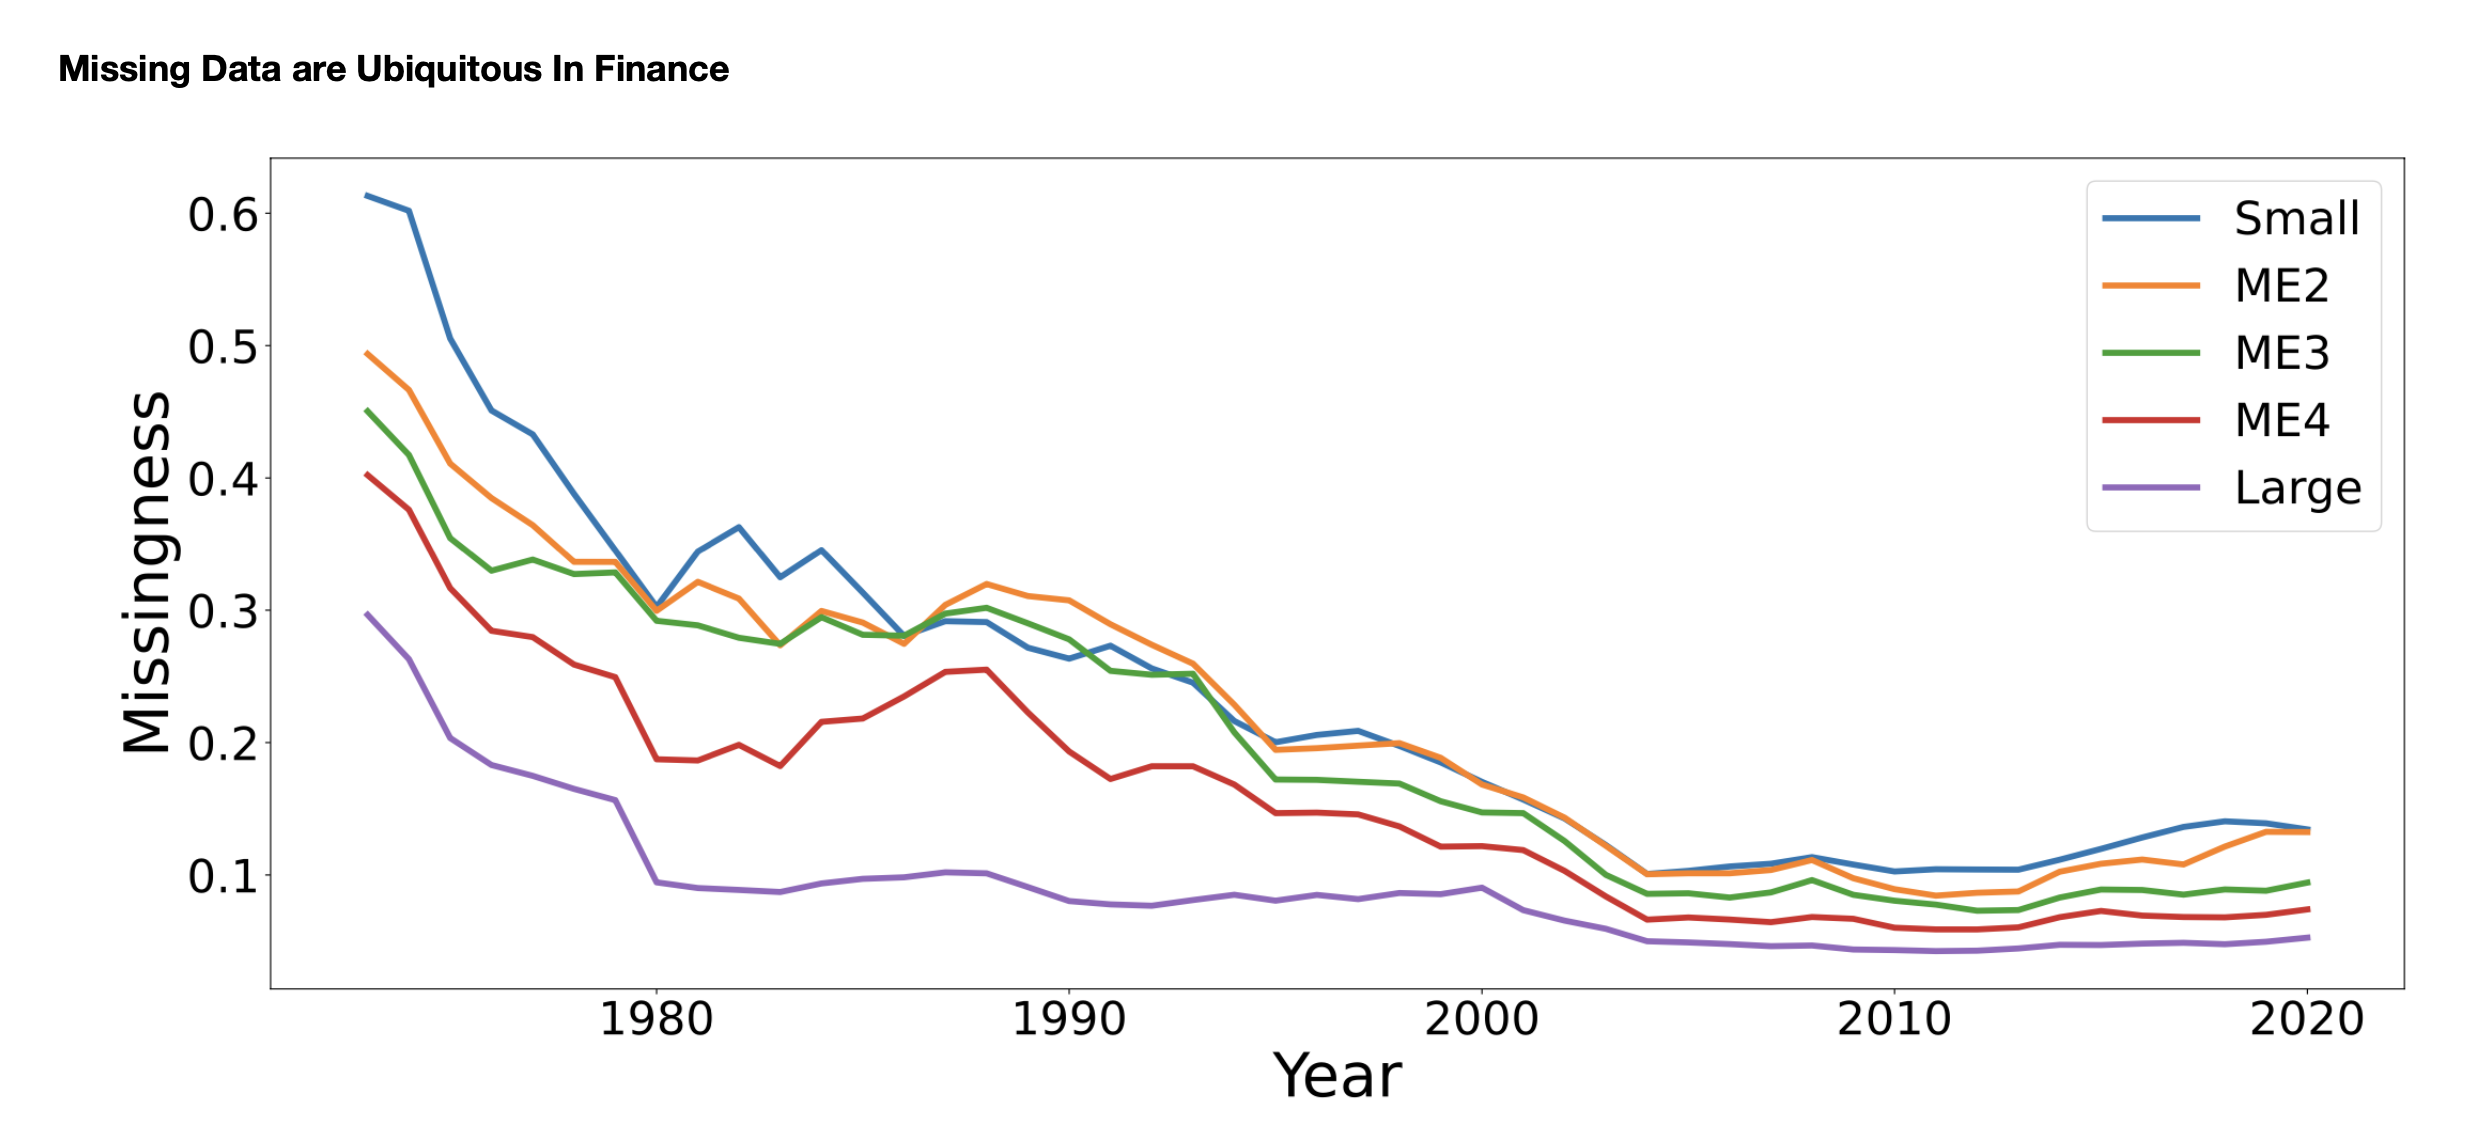

For numeric data, pandas uses the floating-point value ```NaN``` **(Not a Number)** to represent missing data.

In [2]:
string_data = pd.Series(['aardvark', 'artichoke', np.nan, 'avocado'])
string_data

0     aardvark
1    artichoke
2          NaN
3      avocado
dtype: object

In [3]:
string_data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

### 7.1.1 Filtering Out Missing Data

In [4]:
from numpy import nan as NA
data = pd.Series([1, NA, 3.5, NA, 7])
data

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

In [5]:
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

For DataFrame objects, ```dropna``` by default drops any row containing a missing value:

In [6]:
data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA],
                     [NA, NA, NA], [NA, 6.5, 3.]])
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [7]:
cleaned = data.dropna()
cleaned

,0,1,2
0,1.0,6.5,3.0


Passing ```how='all'``` will only drop rows that are **all NA**

In [8]:
data.dropna(how='all') 

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


To drop columns in the same way, pass ```axis=1```:

In [9]:
data[4] = NA
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [ ]:
data.dropna(axis=1, how='all')

A related way to filter out DataFrame rows tends to concern time series data. 

Suppose you want to keep only rows containing a certain number of observations. You can indicate this with the ```thresh``` argument:

In [10]:
df = pd.DataFrame(np.random.randn(7, 3))
df.iloc[:4, 1] = NA
df.iloc[:2, 2] = NA
df

,0,1,2
0,-0.204708,NaN,NaN
1,-0.555730,NaN,NaN
2,0.092908,NaN,0.769023
3,1.246435,NaN,-1.296221
4,0.274992,0.228913,1.352917
5,0.886429,-2.001637,-0.371843
6,1.669025,-0.438570,-0.539741


In [11]:
df.dropna()

,0,1,2
4,0.274992,0.228913,1.352917
5,0.886429,-2.001637,-0.371843
6,1.669025,-0.438570,-0.539741


In [12]:
df.dropna(thresh=2)   # only drop the rows with >= 2 NAs

,0,1,2
2,0.092908,NaN,0.769023
3,1.246435,NaN,-1.296221
4,0.274992,0.228913,1.352917
5,0.886429,-2.001637,-0.371843
6,1.669025,-0.438570,-0.539741


### 7.1.2 Filling In Missing Data

Rather than filtering out missing data (and potentially discarding other data along with it), you may want to **fill in the “holes”**. 

The ```fillna``` method is the workhorse function to use.

In [13]:
df

,0,1,2
0,-0.204708,NaN,NaN
1,-0.555730,NaN,NaN
2,0.092908,NaN,0.769023
3,1.246435,NaN,-1.296221
4,0.274992,0.228913,1.352917
5,0.886429,-2.001637,-0.371843
6,1.669025,-0.438570,-0.539741


In [14]:
df.fillna(0)

,0,1,2
0,-0.204708,0.000000,0.000000
1,-0.555730,0.000000,0.000000
2,0.092908,0.000000,0.769023
3,1.246435,0.000000,-1.296221
4,0.274992,0.228913,1.352917
5,0.886429,-2.001637,-0.371843
6,1.669025,-0.438570,-0.539741


Calling fillna with a ```dict```, you can use a different fill value *for each column*:

In [15]:
df.fillna({1: 0.5, 2: 0})

,0,1,2
0,-0.204708,0.500000,0.000000
1,-0.555730,0.500000,0.000000
2,0.092908,0.500000,0.769023
3,1.246435,0.500000,-1.296221
4,0.274992,0.228913,1.352917
5,0.886429,-2.001637,-0.371843
6,1.669025,-0.438570,-0.539741


In [ ]:
_ = df.fillna(0, inplace=True)   # modify the existing object in-place
df

**Interpolation methods: ```'ffill'```**

In [16]:
df = pd.DataFrame(np.random.randn(6, 3))
df.iloc[2:5, 1] = NA
df.iloc[4:, 2] = NA
df

,0,1,2
0,0.476985,3.248944,-1.021228
1,-0.577087,0.124121,0.302614
2,0.523772,NaN,1.343810
3,-0.713544,NaN,-2.370232
4,-1.860761,NaN,NaN
5,-1.265934,0.119827,NaN


In [17]:
df.fillna(method='ffill')

,0,1,2
0,0.476985,3.248944,-1.021228
1,-0.577087,0.124121,0.302614
2,0.523772,0.124121,1.343810
3,-0.713544,0.124121,-2.370232
4,-1.860761,0.124121,-2.370232
5,-1.265934,0.119827,-2.370232


In [18]:
df.fillna(method='ffill', limit=2)

,0,1,2
0,0.476985,3.248944,-1.021228
1,-0.577087,0.124121,0.302614
2,0.523772,0.124121,1.343810
3,-0.713544,0.124121,-2.370232
4,-1.860761,NaN,-2.370232
5,-1.265934,0.119827,-2.370232


In [ ]:
data = pd.Series([1., NA, 3.5, NA, 7])
data.fillna(data.mean())   # pass the mean or median value of a Series

**Summary of ```fillna``` function arguments**

* ```value``` Scalar value or dict-like object to use to fill missing values
* ```method``` Interpolation; by default ```'ffill'``` if function called with no other arguments 
* ```axis``` Axis to fill on; default ```axis=0```
* ```inplace``` Modify the calling object without producing a copy
* ```limit``` For forward and backward filling, maximum number of consecutive periods to fill



---

## 7.2 Data Transformation

### 7.2.1 Removing Duplicates

In [19]:
data = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'],
                     'k2': [1, 1, 2, 3, 3, 4, 4]})
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


The DataFrame method ```duplicated``` returns a boolean Series indicating whether each row is a duplicate (has been observed in a previous row). 
 * Relatedly, ```drop_duplicates``` method returns a DataFrame where the duplicated array is False.

In [ ]:
data.duplicated()

In [ ]:
data.drop_duplicates()   

Suppose we had an additional column of values and wanted to filter duplicates ***only based on the 'k1' column***

In [ ]:
data['v1'] = range(7)
data

In [ ]:
data.drop_duplicates(['k1'])   

```duplicated``` and ```drop_duplicates``` by default keep the first observed value combination. Passing ```keep='last'``` will **return the last one**. 

In [ ]:
data.drop_duplicates(['k1', 'k2'], keep='last')

### 7.2.2 Replacing Values

In [20]:
data = pd.Series([0.01, -999., 0.025, -999., -1000., -0.015])
data

0       0.010
1    -999.000
2       0.025
3    -999.000
4   -1000.000
5      -0.015
dtype: float64

The **-999** values might be sentinel values for missing data. To replace these with NA values that pandas understands, we can use ```replace```, producing a new Series.

In [21]:
data.replace(-999, np.nan)

0       0.010
1         NaN
2       0.025
3         NaN
4   -1000.000
5      -0.015
dtype: float64

In [22]:
# replace multiple values at once
data.replace([-999, -1000], np.nan)

0    0.010
1      NaN
2    0.025
3      NaN
4      NaN
5   -0.015
dtype: float64

To use a different replacement for each value, pass a list of substitutes:

In [ ]:
data.replace([-999, -1000], [np.nan, 0])

In [ ]:
data.replace({-999: np.nan, -1000: 0})

### 7.2.3 Discretization and Binning

Continuous data is often discretized or otherwise separated into “bins” for analysis.

In [23]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

Let’s divide these into bins of 18 to 25, 26 to 35, 36 to 60, and finally 61 and older. 

To do so, you have to use ```cut``` function in pandas. 

In [24]:
bins = [18, 25, 35, 60, 100]
cats = pd.cut(ages, bins)
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

The object pandas returns is a special **Categorical** object. 

The output you see describes the bins computed by ```pandas.cut```. You can treat it like an array of strings indicating the bin name. 

It contains a ```categories``` array specifying the distinct category names along with a labeling for the ```ages``` data in the ```codes``` attribute:

In [ ]:
cats.codes

In [ ]:
cats.categories

In [25]:
pd.value_counts(cats)   # the counts of frequencies in each bin

(18, 25]     5
(25, 35]     3
(35, 60]     3
(60, 100]    1
dtype: int64

Consistent with mathematical notation for intervals, a parenthesis means that the side is open, while the square bracket means it is closed (inclusive). You can change which side is closed by passing ```right=False```.

In [ ]:
pd.cut(ages, [18, 26, 36, 61, 100], right=False)

You can also pass your own bin names by passing a list or array to the ```labels``` option:

In [ ]:
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']
pd.cut(ages, bins, labels=group_names)

If you pass an integer number of bins to cut instead of explicit bin edges, it will compute **equal-length  bins** based on the minimum and maximum values in the data.

In [26]:
data = np.random.rand(20)
pd.cut(data, 4, precision=2)   # The precision=2 option limits the decimal precision to two digits.

[(0.34, 0.55], (0.34, 0.55], (0.76, 0.97], (0.76, 0.97], (0.34, 0.55], ..., (0.34, 0.55], (0.34, 0.55], (0.55, 0.76], (0.34, 0.55], (0.12, 0.34]]
Length: 20
Categories (4, interval[float64, right]): [(0.12, 0.34] < (0.34, 0.55] < (0.55, 0.76] < (0.76, 0.97]]

A closely related function, ```qcut```, bins the data based on sample quantiles. 

Depending on the distribution of the data, using ```cut``` will not usually result in each bin having the same number of data points. Since ```qcut``` uses sample quantiles instead, by definition you will obtain ***roughly equal-size bins***.

In [33]:
pd.cut(data, 4).value_counts()

(-3.57, -1.982]     24
(-1.982, -0.4]     302
(-0.4, 1.182]      560
(1.182, 2.764]     114
dtype: int64

In [31]:
np.random.seed(1234)
data = np.random.randn(1000)  # Normally distributed
cats = pd.qcut(data, 4)  # Cut into quartiles
cats

[(0.0178, 0.669], (-3.565, -0.624], (0.669, 2.764], (-0.624, 0.0178], (-3.565, -0.624], ..., (0.0178, 0.669], (0.669, 2.764], (0.0178, 0.669], (0.669, 2.764], (-3.565, -0.624]]
Length: 1000
Categories (4, interval[float64, right]): [(-3.565, -0.624] < (-0.624, 0.0178] < (0.0178, 0.669] < (0.669, 2.764]]

In [32]:
pd.value_counts(cats)   # the number of observations are 250 in each group

(-3.565, -0.624]    250
(-0.624, 0.0178]    250
(0.0178, 0.669]     250
(0.669, 2.764]      250
dtype: int64

Similar to ```cut``` you can pass your own quantiles (numbers between 0 and 1, inclusive):

In [ ]:
pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.])

In [ ]:
pd.value_counts(pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.]))   

### 7.2.4 Detecting and Filtering Outliers

In [ ]:
data = pd.DataFrame(np.random.randn(1000, 4))
data.describe()

Suppose you wanted to find values in one of the columns exceeding 3 in absolute value:

In [ ]:
col = data[2]
col[np.abs(col) > 3]

In [ ]:
data[(np.abs(data) > 3).any(axis=1)]   # select all rows having a value exceeding 3 or –3

In [ ]:
data[np.abs(data) > 3] = np.sign(data) * 3   # cap values outside the inter‐ val –3 to 3
data.describe()

In [ ]:
np.sign(data).head()  # The statement np.sign(data) produces 1 and –1 values based on 
                      # whether the values in data are positive or negative:

### 7.2.5 Computing Indicator/Dummy Variables

Let's consider converting a categorical variable into a “dummy” or “indicator” matrix.

For example, if a column in a DataFrame has k distinct values, you would derive a matrix or DataFrame with k columns containing all 1s and 0s. ```pandas``` has a ```get_dummies``` function for doing this. 

In [34]:
df = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                   'data1': range(6)})
df

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [35]:
pd.get_dummies(df['key'])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In some cases, you may want to add a prefix to the columns in the indicator DataFrame

In [ ]:
dummies = pd.get_dummies(df['key'], prefix='key')
dummies

In [ ]:
df_with_dummy = df[['data1']].join(dummies)
df_with_dummy

A useful recipe for statistical applications is to combine ```get_dummies``` with a discretization function like ```cut```:

In [36]:
np.random.seed(12345)
values = np.random.rand(100)
values

array([0.9296, 0.3164, 0.1839, 0.2046, 0.5677, 0.5955, 0.9645, 0.6532,
       0.7489, 0.6536, 0.7477, 0.9613, 0.0084, 0.1064, 0.2987, 0.6564,
       0.8098, 0.8722, 0.9646, 0.7237, 0.6425, 0.7175, 0.4676, 0.3256,
       0.4396, 0.7297, 0.994 , 0.6769, 0.7908, 0.1709, 0.0268, 0.8004,
       0.9037, 0.0247, 0.4917, 0.5263, 0.5964, 0.052 , 0.8951, 0.7283,
       0.8184, 0.5002, 0.8102, 0.096 , 0.219 , 0.2587, 0.4681, 0.4594,
       0.7095, 0.1781, 0.5314, 0.1677, 0.7688, 0.9282, 0.6095, 0.1502,
       0.4896, 0.3773, 0.8486, 0.9111, 0.3838, 0.3155, 0.5684, 0.1878,
       0.1258, 0.6876, 0.7996, 0.5735, 0.9732, 0.6341, 0.8884, 0.4954,
       0.3516, 0.7142, 0.5039, 0.2256, 0.245 , 0.7928, 0.4952, 0.9151,
       0.9454, 0.5332, 0.2525, 0.7209, 0.3674, 0.4986, 0.2266, 0.3536,
       0.6509, 0.3129, 0.7687, 0.7818, 0.8524, 0.9499, 0.1073, 0.9107,
       0.3361, 0.8264, 0.8981, 0.0427])

In [37]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
pd.get_dummies(pd.cut(values, bins))

,"(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
0,0,0,0,0,1
1,0,1,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0
...,...,...,...,...,...
95,0,0,0,0,1
96,0,1,0,0,0
97,0,0,0,0,1
98,0,0,0,0,1


---

# END